# Predict TCR and HLA association

T cells serve as a record of an individual’s immune responses, with certain TCRs exclusively found in individuals carrying specific HLA alleles. Therefore, a comprehensive analysis of TCR–HLA associations is crucial for characterizing TCRs and understanding their antigen specificities. By uncovering patterns of TCR–HLA co-occurrence, we can gain insight into the rules governing T cell recognition, improve prediction of antigen-specific responses, and identify potential biomarkers for infection, autoimmunity, or cancer. Moreover, such insights are essential for the development of precision immunotherapies and vaccine strategies tailored to individual HLA backgrounds.

```{image} ../_static/TCR_HLA.png
:alt: 模型结果图
:width: 800px
:align: center

## Load required libraries

In [15]:
import pandas as pd
from trimap import utils
import trimap
from trimap.model import TCRbind
import torch
import numpy as np

print(f"Using trimap version {trimap.__version__}")

seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Using trimap version 1.0.5


## Load our training data
1. TCRs with alpha and beta chain, V and J gene information 
2. HLA information

[Download VDJdb.csv](https://drive.google.com/file/d/1TpgkOJunKct8KJ43ntYFjGjhs6W92vrI/view?usp=drive_link)

[Download hla_dict_34.npy](https://drive.google.com/file/d/16X8CqaIOq6qbbA6zUW9-AGxzi5CUIcO_/view?usp=drive_link)

In [16]:
df_data = pd.read_csv('VDJdb.csv')

df_data['alpha'] = utils.determine_tcr_seq_vj(df_data['alpha'].tolist(), df_data['V_alpha'].tolist(), df_data['J_alpha'].tolist(), chain='A')
df_data['beta'] = utils.determine_tcr_seq_vj(df_data['beta'].tolist(), df_data['V_beta'].tolist(), df_data['J_beta'].tolist(), chain='B')

In [17]:
hla_dict = np.load('hla_dict_34.npy', allow_pickle=True).item()
hla_name = ['HLA-'+i for i in list(hla_dict.keys())]
df_data = df_data[df_data['HLA'].isin(hla_name)]

## Randomly split the data into training and test sets

In [18]:
df_train = df_data.sample(frac=0.8, random_state=seed)
df_test = df_data.drop(df_train.index)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

## Train and save the model

In [5]:
model = TCRbind().to(device)
model.train_model(df=df_train, num_epochs=20, device=device, targets='hla', hla_dict=hla_dict, hla_model_dir='hla_model.pt')
torch.save(model.state_dict(), 'TCR_HLA_model.pt')

INFO:trimap.model:Training...
/local_home/cao/miniconda3/envs/trimap-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
INFO:trimap.model:Loading alpha_dict.pt
INFO:trimap.model:Found new alpha sequences, embedding...
100%|██████████| 8/8 [00:36<00:00,  4.52s/it]
INFO:trimap.model:Updated and saved alpha_dict.pt
INFO:trimap.model:Loading beta_dict.pt

Epoch [1/20], Loss: 0.6165, ROC: 0.5775


100%|██████████| 292/292 [01:49<00:00,  2.67it/s]


Epoch [2/20], Loss: 0.5566, ROC: 0.6337


100%|██████████| 292/292 [01:40<00:00,  2.91it/s]


Epoch [3/20], Loss: 0.5209, ROC: 0.6567


100%|██████████| 293/293 [01:43<00:00,  2.83it/s]


Epoch [4/20], Loss: 0.5115, ROC: 0.6716


100%|██████████| 293/293 [01:40<00:00,  2.90it/s]


Epoch [5/20], Loss: 0.4143, ROC: 0.6811


100%|██████████| 292/292 [01:44<00:00,  2.79it/s]


Epoch [6/20], Loss: 0.5886, ROC: 0.6893


100%|██████████| 292/292 [01:37<00:00,  2.99it/s]


Epoch [7/20], Loss: 0.4995, ROC: 0.6974


100%|██████████| 293/293 [01:43<00:00,  2.83it/s]


Epoch [8/20], Loss: 0.5272, ROC: 0.7074


100%|██████████| 292/292 [01:50<00:00,  2.63it/s]


Epoch [9/20], Loss: 0.4863, ROC: 0.7110


100%|██████████| 293/293 [01:56<00:00,  2.51it/s]


Epoch [10/20], Loss: 0.5902, ROC: 0.7174


100%|██████████| 293/293 [01:52<00:00,  2.60it/s]


Epoch [11/20], Loss: 0.5330, ROC: 0.7232


100%|██████████| 292/292 [01:44<00:00,  2.80it/s]


Epoch [12/20], Loss: 0.5226, ROC: 0.7295


100%|██████████| 292/292 [01:58<00:00,  2.46it/s]


Epoch [13/20], Loss: 0.5296, ROC: 0.7363


100%|██████████| 292/292 [01:55<00:00,  2.53it/s]


Epoch [14/20], Loss: 0.5217, ROC: 0.7415


100%|██████████| 292/292 [01:50<00:00,  2.63it/s]


Epoch [15/20], Loss: 0.4597, ROC: 0.7465


100%|██████████| 292/292 [01:52<00:00,  2.60it/s]


Epoch [16/20], Loss: 0.5400, ROC: 0.7505


100%|██████████| 292/292 [01:51<00:00,  2.61it/s]


Epoch [17/20], Loss: 0.3734, ROC: 0.7555


100%|██████████| 292/292 [01:44<00:00,  2.79it/s]


Epoch [18/20], Loss: 0.5391, ROC: 0.7628


100%|██████████| 292/292 [01:52<00:00,  2.59it/s]


Epoch [19/20], Loss: 0.4631, ROC: 0.7670


100%|██████████| 292/292 [01:48<00:00,  2.70it/s]


Epoch [20/20], Loss: 0.4870, ROC: 0.7733


### (optional) Load pretrained model

[Download TCR_HLA_model.pth](https://drive.google.com/file/d/1xon5P5bUy6wqVjw-_eqhSqAJ708g57Cm/view?usp=drive_link)

In [19]:
model = TCRbind().to(device)
model.load_state_dict(torch.load('TCR_HLA_model.pt', map_location=device))

<All keys matched successfully>

## Test the performance of the model
Adding negative samples to the test set

In [20]:
df_test_negtaive = utils.negative_sampling(df_test)
df_test['label'] = 1
df_test_negtaive['label'] = 0
df_test = pd.concat([df_test, df_test_negtaive])
df_test.reset_index(drop=True, inplace=True)

result, cdr3a_attn, cdr3b_attn = model.test_model(df_test=df_test, device=device, targets='hla', hla_dict=hla_dict, hla_model_dir='HLA_model.pt')
df_test['pred'] = result

INFO:trimap.model:Loading alpha_dict.pt
INFO:trimap.model:No new alpha sequences found
INFO:trimap.model:Loading beta_dict.pt
INFO:trimap.model:No new beta sequences found
INFO:trimap.model:Predicting...
100%|██████████| 74/74 [00:27<00:00,  2.73it/s]


## Show the performance of top 10 HLA alleles

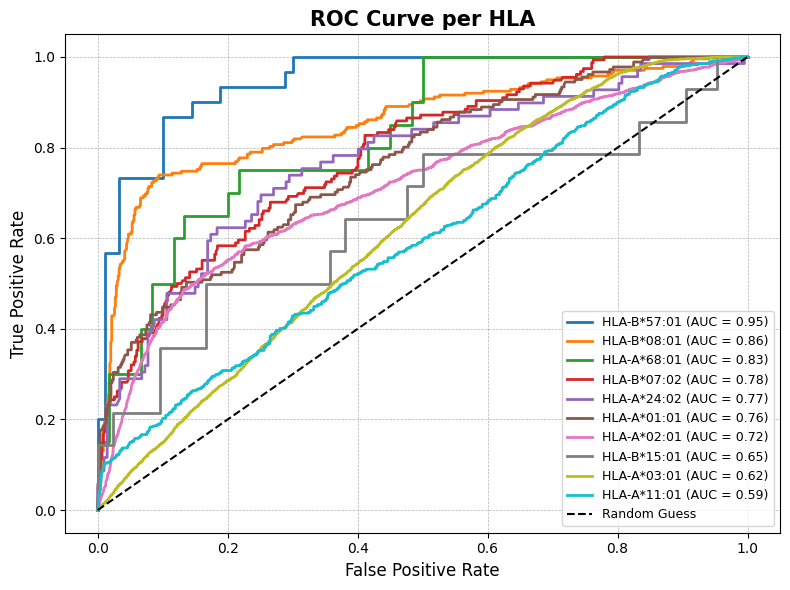

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_per_hla(df, pred_col='pred', label_col='label', hla_col='HLA', top_k=10, figsize=(8, 6), title='ROC Curve per HLA'):
    """
    Plot ROC curves for the top-k most frequent HLAs based on AUC.

    Args:
        df (pd.DataFrame): DataFrame with HLA, prediction, and label columns.
        pred_col (str): Column name for predicted scores.
        label_col (str): Column name for ground truth labels (0/1).
        hla_col (str): Column name for HLA type.
        top_k (int): Number of most frequent HLAs to plot.
        figsize (tuple): Figure size.
        title (str): Title of the plot.
    """
    # Get top-k most frequent HLAs
    top_hlas = df[hla_col].value_counts().head(top_k).index.tolist()
    
    hla_auc = {}

    # Compute AUCs
    for hla in top_hlas:
        hla_df = df[df[hla_col] == hla]
        fpr, tpr, _ = roc_curve(hla_df[label_col].values, hla_df[pred_col].values)
        hla_auc[hla] = auc(fpr, tpr)

    # Sort HLAs by AUC
    sorted_hlas = sorted(top_hlas, key=lambda x: hla_auc[x], reverse=True)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    for hla in sorted_hlas:
        hla_df = df[df[hla_col] == hla]
        fpr, tpr, _ = roc_curve(hla_df[label_col].values, hla_df[pred_col].values)
        ax.plot(fpr, tpr, lw=2, label=f'{hla} (AUC = {hla_auc[hla]:.2f})')

    # Baseline and formatting
    ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
plot_roc_per_hla(df_test, pred_col='pred', label_col='label', hla_col='HLA', top_k=10)

## Generalize to other unseen TCRs from external IEDB dataset

Download [IEDB_HLA_top7.csv](https://drive.google.com/file/d/1TpnbvYAPs8X31A_ZnRLGP8SSjkPIqWXF/view?usp=drive_link).

HLA
HLA-A*02:01    835
HLA-B*07:02    195
HLA-A*24:02     96
HLA-B*37:01     95
HLA-A*01:01     94
HLA-B*15:02     42
HLA-B*08:01     39
Name: count, dtype: int64


INFO:trimap.model:Loading alpha_dict.pt
INFO:trimap.model:No new alpha sequences found
INFO:trimap.model:Loading beta_dict.pt
INFO:trimap.model:No new beta sequences found
INFO:trimap.model:Predicting...
100%|██████████| 16/16 [00:07<00:00,  2.17it/s]


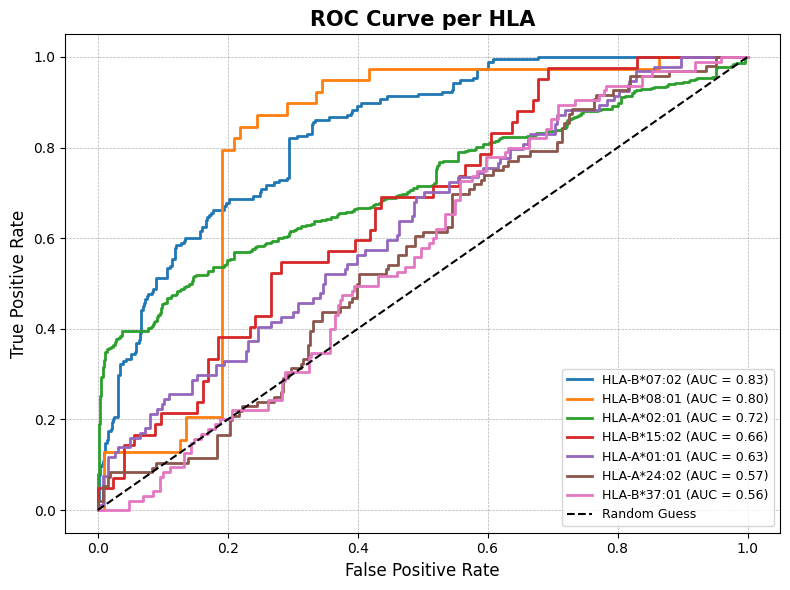

In [23]:
IEDB = pd.read_csv('IEDB_HLA_top7.csv')
print(IEDB['HLA'].value_counts())
negative_samples = utils.negative_sampling(IEDB)
IEDB['label'] = 1
negative_samples['label'] = 0
IEDB = pd.concat([IEDB, negative_samples])
IEDB.reset_index(drop=True, inplace=True)

result, cdr3a_attn, cdr3b_attn = model.test_model(df_test=IEDB, device=device, targets='hla', hla_dict=hla_dict, hla_model_dir='HLA_model.pt')
IEDB['pred'] = result

plot_roc_per_hla(IEDB, pred_col='pred', label_col='label', hla_col='HLA', top_k=10)